### Carga de las librerías

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

### Carga de los datos y análisis preliminar

In [44]:
df_DB = pd.DataFrame(pd.read_csv(r"../data/output_steam_games.csv"))
df_DB.sample(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
20164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89041,Wizards of the Coast LLC,['Strategy'],Magic: The Gathering 2012 - Expansion,Magic: The Gathering 2012 - Expansion,http://store.steampowered.com/app/49473/Magic_...,2011-09-14,['Strategy'],http://steamcommunity.com/app/49473/reviews/?b...,"['Single-player', 'Multi-player', 'Co-op', 'Do...",4.99,False,49473.0,Stainless Games Ltd
30584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  object 
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(1), object(12)
memory usage: 11.9+ MB


Como sabemos las decisiones sobre la utilidad de los datos depende del objetivo, por ello y habiendo dos objetivos amplios para nuestro MVP, a saber: una API y modelos de recomendación, se deben considerar dos conjuntos de datos diferentes.

Iniciaremos el análisis de las transformaciones que sean útiles para ambos conjuntos de datos, luego en determinado punto del proceso los objetivos hacen que deban realizarse acciones diferentes.

#### Primera etapa: Análisis y transformaciones de carácter general

Los registros que carece de valores en la columna "id", que contiene el identificador, no son de utilidad ni para las consultas ni para las relaciones con los otros datasets.

Dado que es fundamental para resolver adecuadamente las tareas solicitadas contar con datos en el campo "genres", se deberán eliminar los registros con valores nulos.

* Por cuestiones de claridad, <b><i>cambiar el nombre de la columna "<u>id</u>" a "<u>item_id</u>".
* <b><i>Eliminar las filas que contiene valores nulos para el campo "<u>item_id</u>".</i></b>
* <b><i>Eliminar las filas que contiene valores nulos para el campo "<u>genres</u>".</i></b>
* <b><i>Eliminar las columnas "publisher", "<u>url</u>" y "<u>reviews_url</u>"</i></b>
* <b><i>Crear la columna "anio_lanzamiento", completando su valor con el año extraido de la columna "<u>release_date</u>"
* Eliminar la columna "<u>release_date</u>".</i></b>

#### Procesamiento previo

In [46]:
# Cambiar el nombre de la columna id a "item_id"
df_DB.rename(columns={"id":"item_id"}, inplace=True)

In [47]:
# Eliminar las filas que contiene valores nulos para el campo "item_id"
filtro = df_DB[df_DB.item_id.isnull()].index
df_DB.drop(filtro, inplace=True)
df_DB.reset_index(inplace=True, drop=True)

In [48]:
# Eliminar las filas que contiene valores nulos para el campo "genres"
filtro = df_DB[df_DB.genres.isnull()].index
df_DB.drop(filtro, inplace=True)
df_DB.reset_index(inplace=True, drop=True)

In [49]:
# Eliminar las columnas "publisher", "url" y "reviews_url"

# Creo variable con los nombres de la columas a eliminar
columnasEliminar = ["publisher", "url", "reviews_url"]

# Elimino las columnas
df_DB.drop(columnasEliminar, axis=1, inplace=True)

In [50]:
# Crear la columna "anio_lanzamiento", completando su valor con el año extraido de la columna "release_date"
df_DB["anio_lanzamiento"] = df_DB["release_date"].apply(lambda x: str(x)[:4] if str(x)[:4].isnumeric() else 0)

In [51]:
# Eliminar la columna "release_date"
df_DB.drop(["release_date"], axis=1, inplace=True)

In [52]:
df_DB.sample(5)

,genres,app_name,title,tags,specs,price,early_access,item_id,developer,anio_lanzamiento
10121,"['Adventure', 'Casual', 'Indie']",Angry Gnome,Angry Gnome,"['Adventure', 'Indie', 'Casual']",['Single-player'],2.99,False,685920.0,Gorbachev V.A.,2017
9204,"['Design &amp; Illustration', 'Web Publishing']",RPG Maker MV - Discovered Space Planets,RPG Maker MV - Discovered Space Planets,"['Design & Illustration', 'Web Publishing']","['Downloadable Content', 'Steam Trading Cards'...",14.99,False,653723.0,"KADOKAWA,Yoji Ojima",2017
19357,"['Adventure', 'Indie']",Rising Islands,Rising Islands,"['Indie', 'Adventure', 'Platformer', 'Singlepl...","['Single-player', 'Steam Achievements', 'Full ...",9.99,False,452450.0,Lone Hero Studios,2016
7651,"['Indie', 'RPG', 'Strategy']",Moekuri: Adorable + Tactical SRPG,Moekuri: Adorable + Tactical SRPG,"['RPG', 'Indie', 'Anime', 'Strategy', 'Cute', ...","['Single-player', 'Steam Achievements', 'Steam...",11.99,False,529160.0,MokyuSoft,2016
24382,"['Action', 'Casual', 'Free to Play']",Lost Saga - White Grim Reaper's Perfect Package,Lost Saga - White Grim Reaper's Perfect Package,"['Action', 'Casual', 'Free to Play']","['Multi-player', 'Downloadable Content', 'Stea...",24.99,False,343760.0,IO Entertainment,2014


In [53]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28851 entries, 0 to 28850
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28851 non-null  object 
 1   app_name          28850 non-null  object 
 2   title             28850 non-null  object 
 3   tags              28827 non-null  object 
 4   specs             28565 non-null  object 
 5   price             27621 non-null  object 
 6   early_access      28851 non-null  object 
 7   item_id           28851 non-null  float64
 8   developer         28681 non-null  object 
 9   anio_lanzamiento  28851 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.2+ MB


### Análisis de valores faltantes

In [54]:
df_DB.isna().sum()

genres                 0
app_name               1
title                  1
tags                  24
specs                286
price               1230
early_access           0
item_id                0
developer            170
anio_lanzamiento       0
dtype: int64

Text(0.5, 1.0, 'Valores Nulos')

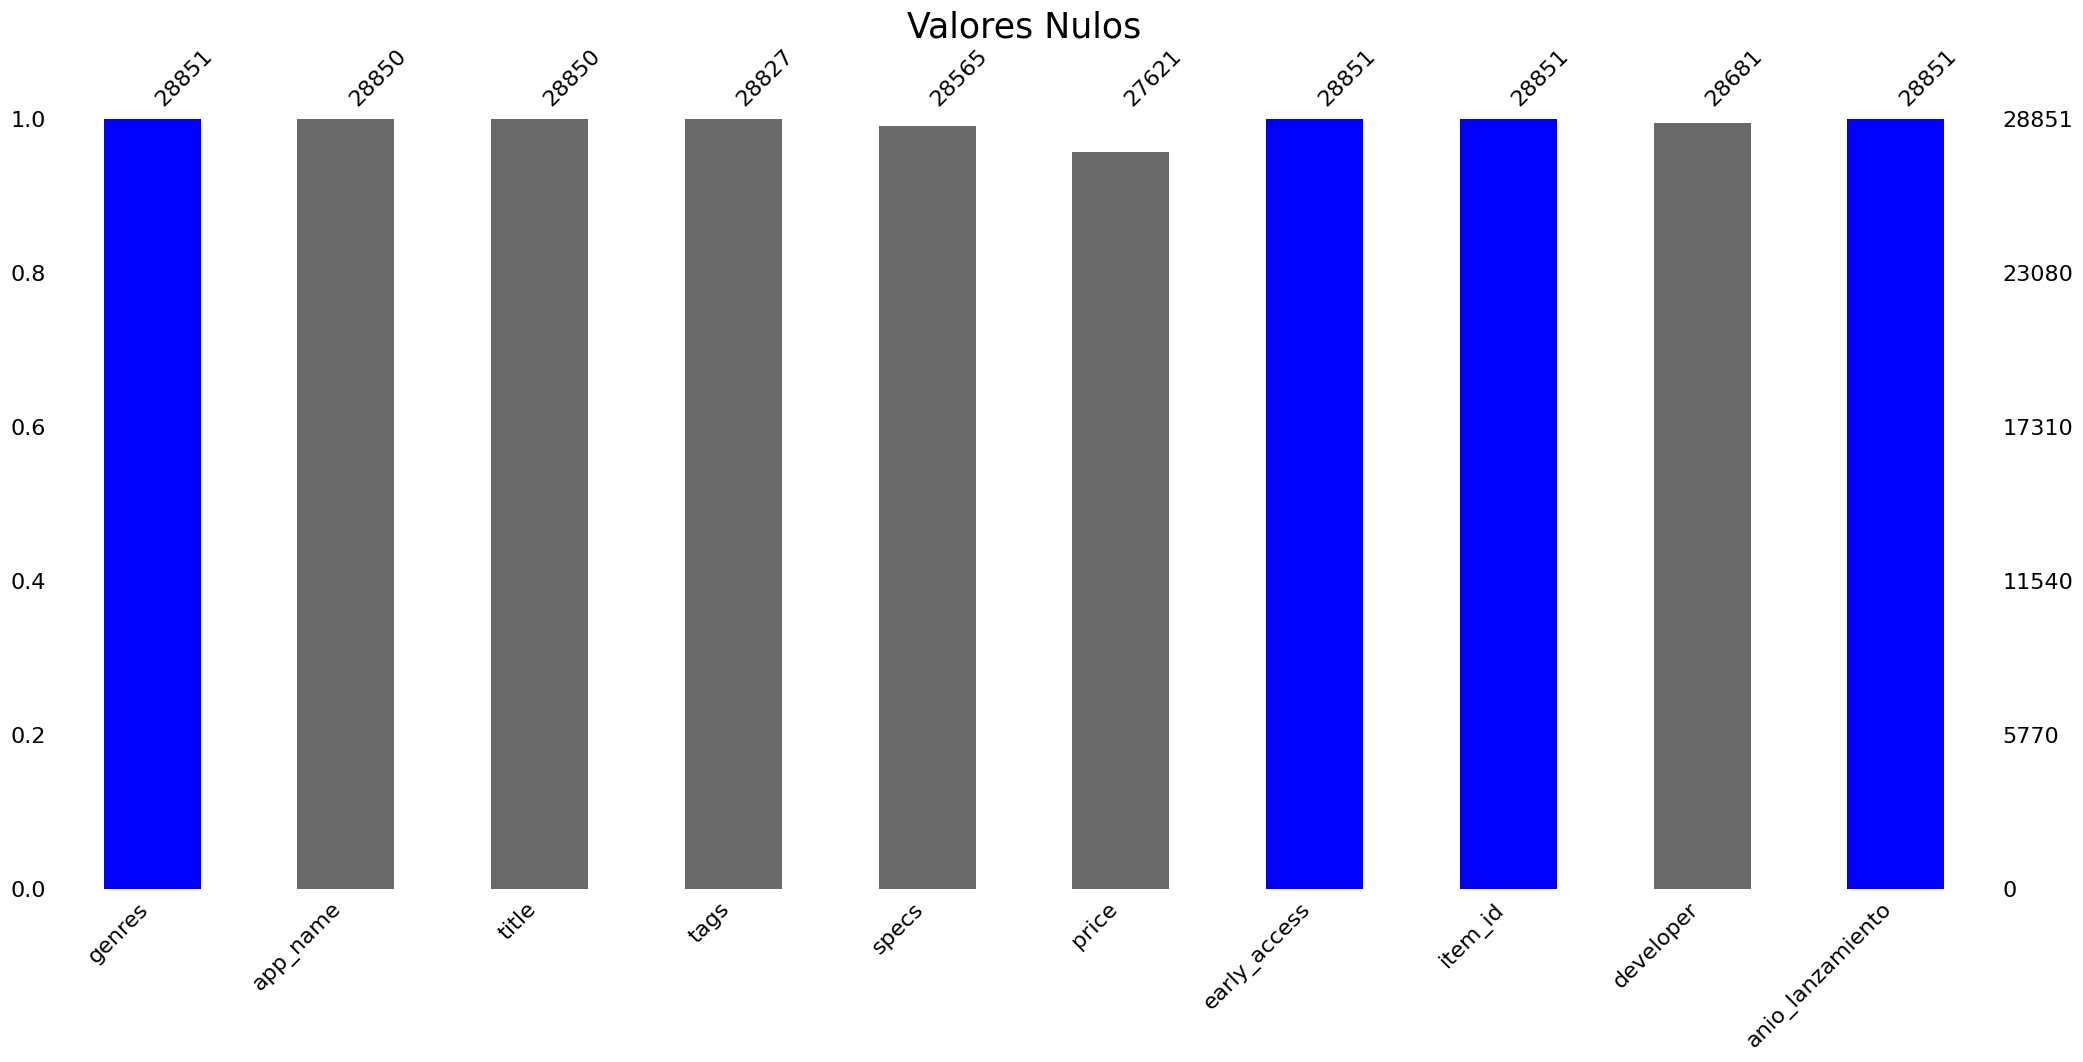

In [55]:
# Uso missigno para analizar datos perdidos
import missingno
#graficamos los registros válidos
color =["blue", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "blue", "blue", "dimgrey", "blue"]
missingno.bar(df_DB, color=color)
plt.title("Valores Nulos", fontsize=25)

In [56]:
df_DB[df_DB["app_name"].isna()]

,genres,app_name,title,tags,specs,price,early_access,item_id,developer,anio_lanzamiento
2523,"['Action', 'Indie']",NaN,NaN,"['Action', 'Indie']","['Single-player', 'Game demo']",NaN,False,317160.0,NaN,2014


Sólo existe un valor nulo para el campo "app_name" y le falta datos en varias de las otras columnas (incluida "title"), dada la escasa incidencia es adecuado eliminarla.

In [57]:
df_DB.drop(df_DB[df_DB["app_name"].isna()].index, inplace=True)
df_DB.reset_index(inplace=True, drop=True)

Ya no necesitamos la columna "app_name", la mantuve hasta este momento por que si tenía valores faltantes en la columna "title" podía rellenanlos con el valor de "app_name". Ya puedo eliminarla.

In [58]:
df_DB.drop(["app_name"], axis=1, inplace=True)

Los valores faltantes de los campo "tags", "specs", "price", "early_access" y "developer", los dejaremos sin tratamiento por el momento porque será diferente para ambos conjuntos de datos (para API y para los modelos de recomendación).

In [59]:
df_DB["anio_lanzamiento"].describe()

count     28850
unique       39
top        2017
freq       9230
Name: anio_lanzamiento, dtype: object

In [60]:
#df_DB["anio_lanzamiento"].min()

In [61]:
df_DB["anio_lanzamiento"] = df_DB["anio_lanzamiento"].astype(int)

In [62]:
df_DB["anio_lanzamiento"].min()

0

In [63]:
df_DB["anio_lanzamiento"].max()

2021

In [64]:
# Distribución de la registros por anio_lanzamiento (True,False)
lanzamiento = df_DB["anio_lanzamiento"].value_counts()
porcentaje = 100*df_DB["anio_lanzamiento"].value_counts(normalize=True)
pd.DataFrame({"Año de Lanzamiento":lanzamiento, "Porcentaje":porcentaje.round(2)})

,Año de Lanzamiento,Porcentaje
anio_lanzamiento,,
2017,9230,31.99
2016,6692,23.20
2015,4794,16.62
2014,2727,9.45
2013,1477,5.12
2012,1137,3.94
2011,541,1.88
2010,393,1.36
2009,316,1.10


Para la columna "anio_lanzamiento", los registros con  valores de año en "0" son 255, lo que es el 0.88% de los datos y dada la escasa incidencia en el set de datos y que es importante para ambas bases de datos disponer de este campo, es adecuado eliminar los registros en que año sea igual a "0".
El resto de los datos de esta columna parecen coherentes.

In [65]:
filtro = df_DB[df_DB.anio_lanzamiento == 0].index
df_DB.drop(filtro, inplace=True)
df_DB.reset_index(inplace=True, drop=True)

In [66]:
import plotly.express as px
fig = px.histogram(df_DB, x="anio_lanzamiento",title="Distribución de Juegos por Años de Lanzamiento")
fig.update_layout(bargap=0.1)
fig.show()

In [67]:
df_DB["anio_lanzamiento"][(df_DB["anio_lanzamiento"]<2005) | (df_DB["anio_lanzamiento"]>2017)].count()

711

Viendo la distribución, hay datos que parecen ser outliers, y dada la escasa inidencia de total de datos los eliminaremos

In [68]:
filtro = df_DB[(df_DB.anio_lanzamiento < 2005) | (df_DB.anio_lanzamiento > 2017)].index
df_DB.drop(filtro, inplace=True)
df_DB.reset_index(inplace=True, drop=True)

In [69]:
fig = px.histogram(df_DB, x="anio_lanzamiento",title="Distribución de Juegos por Años de Lanzamiento")
fig.update_layout(bargap=0.1)
fig.show()

In [70]:
df_DB.isna().sum()

genres                0
title                 0
tags                 23
specs               285
price               951
early_access          0
item_id               0
developer           160
anio_lanzamiento      0
dtype: int64

Text(0.5, 1.0, 'Valores Válidos')

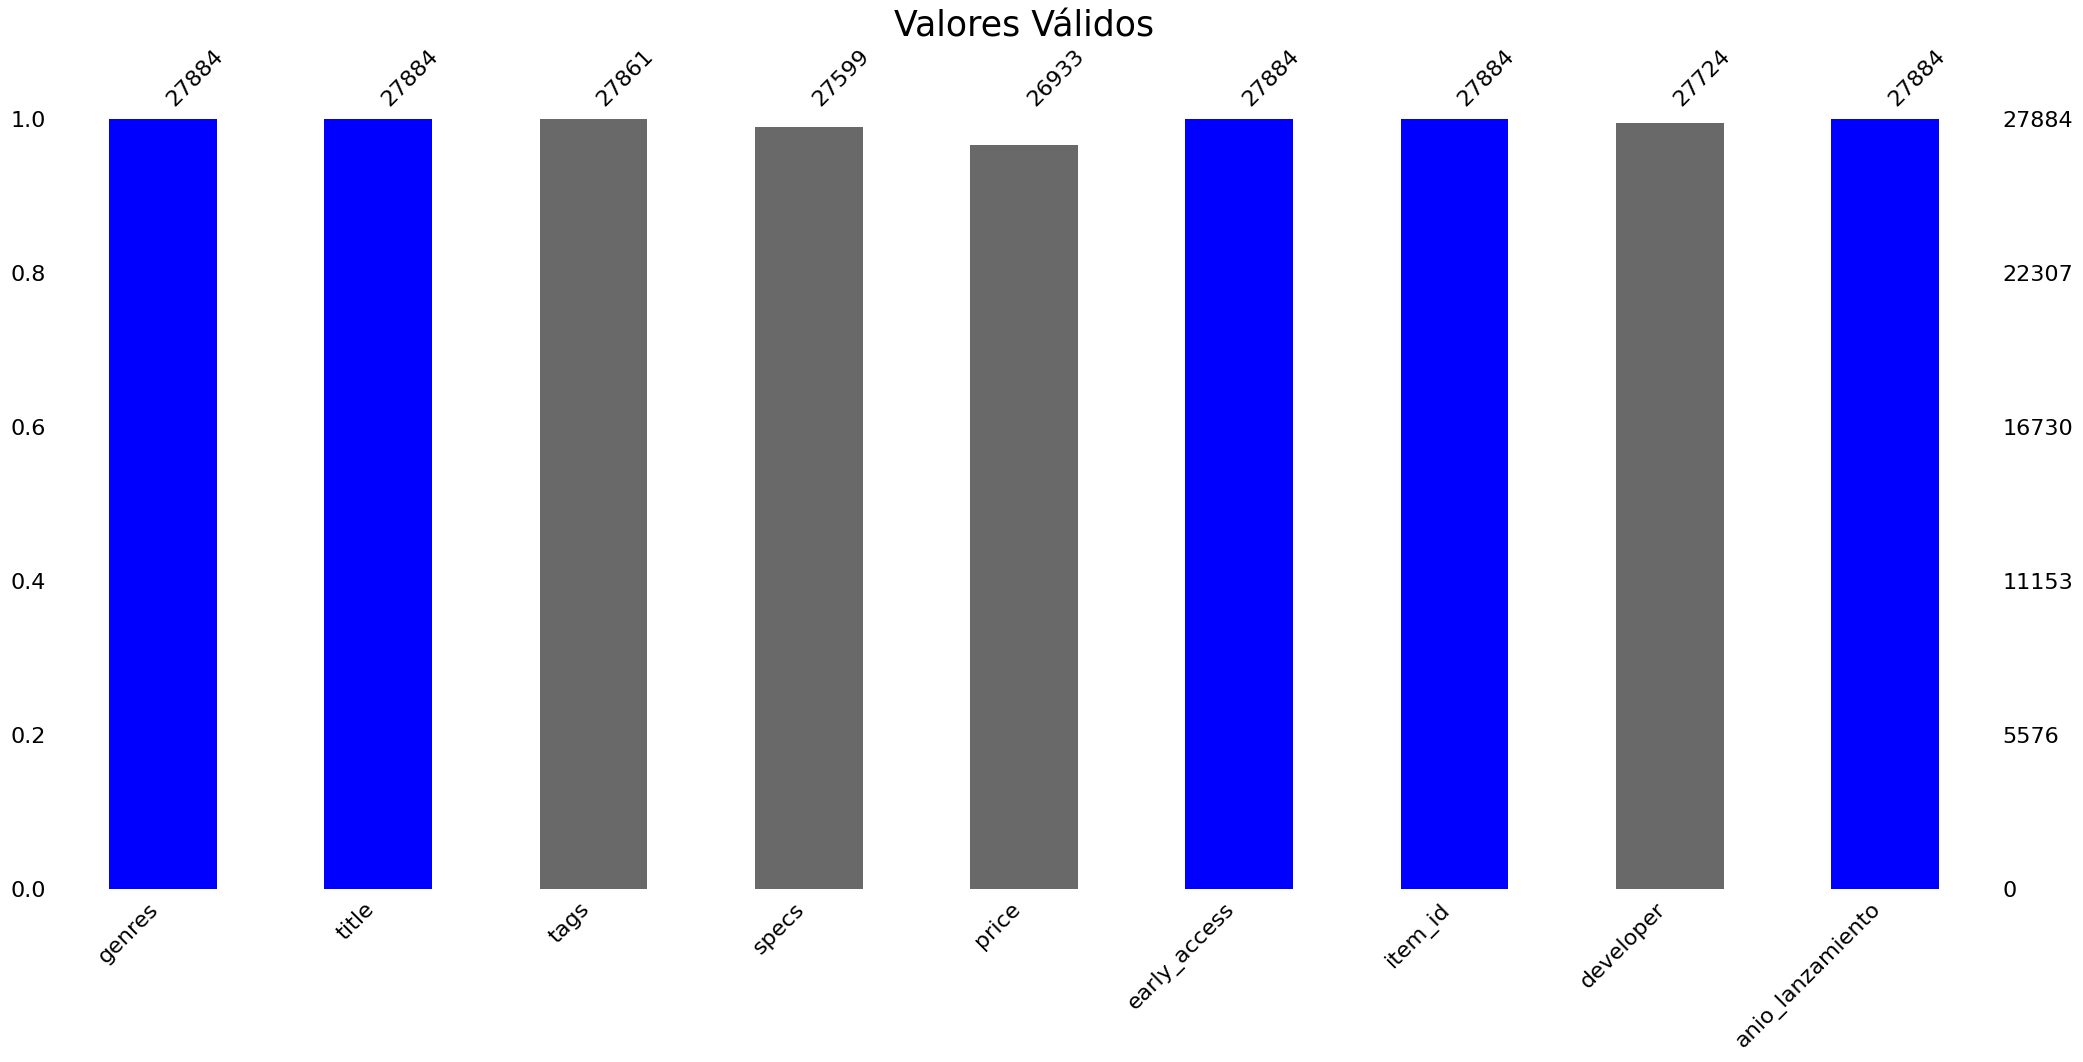

In [71]:
# Uso missigno para analizar datos perdidos
import missingno
#graficamos los registros válidos
color =["blue", "blue", "dimgrey", "dimgrey", "dimgrey", "blue", "blue", "dimgrey", "blue"]
missingno.bar(df_DB, color=color)
plt.title("Valores Válidos", fontsize=25)

****

### Hasta acá las transformaciones comunes a ambas bases de datos

##### La rama en que se trabajará con los <u>datos para la API</u> continuará con la base de datos que se viene trabajando, es decir "<u>df_DB</u>".

##### Haremos una copia para luego hacer el análisis y transformaciones de los datos para generar los <u>modelos de recomendaciones</u> que se llamará "<u>df_DB_MR</u>".

In [72]:
df_DB_MR = df_DB.copy()

***

## Análisis específico del dataset para la API

Empezaremos nos desharemos de las columnas que ya no son necesarias: **Eliminamos "_tags_", "_specs_", "_price_", "_early_access_" y "_developer_"**.

In [73]:
# Creo variable con los nombres de la columas a eliminar
columnasEliminar = ["tags", "specs", "price", "early_access", "developer"]

# Elimino las columnas
df_DB.drop(columnasEliminar, axis=1, inplace=True)

In [74]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27884 entries, 0 to 27883
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            27884 non-null  object 
 1   title             27884 non-null  object 
 2   item_id           27884 non-null  float64
 3   anio_lanzamiento  27884 non-null  int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 762.6+ KB


Normalizo la columna "genres" para que pueda ser convertida fácilmente en una lista por las funciones de búsquedas.

In [75]:
# Convierto el contenido de la columna y remuevo los caracteres que no deben estar ([]'")
df_DB["genres"] = df_DB["genres"].str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"',"").str.replace(';',",")

# Reemplazo los registros que contienen NaN 
# por una cadena de texto vacía
df_DB["genres"][(df_DB["genres"].isna()) | (df_DB["genres"].isnull())] = ""

# Recorro cada una de los registros y quito 
# los espacios en los extremos de cada elemento
for i in range(1,len(df_DB.index)):
    cadena = ""
    for j,elemento in enumerate(list(df_DB["genres"][i].split(","))):
        if j > 0:
            cadena += ","
        cadena += elemento.strip()
    df_DB["genres"][i] = cadena

In [76]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27884 entries, 0 to 27883
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            27884 non-null  object 
 1   title             27884 non-null  object 
 2   item_id           27884 non-null  float64
 3   anio_lanzamiento  27884 non-null  int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 762.6+ KB


In [77]:
# Cambio el tipo de datos de las columnas item_id y anio_post a entero
df_DB["item_id"] = df_DB["item_id"].astype("int")

In [78]:
df_DB.isna().sum()

genres              0
title               0
item_id             0
anio_lanzamiento    0
dtype: int64

Text(0.5, 1.0, 'Valores Válidos')

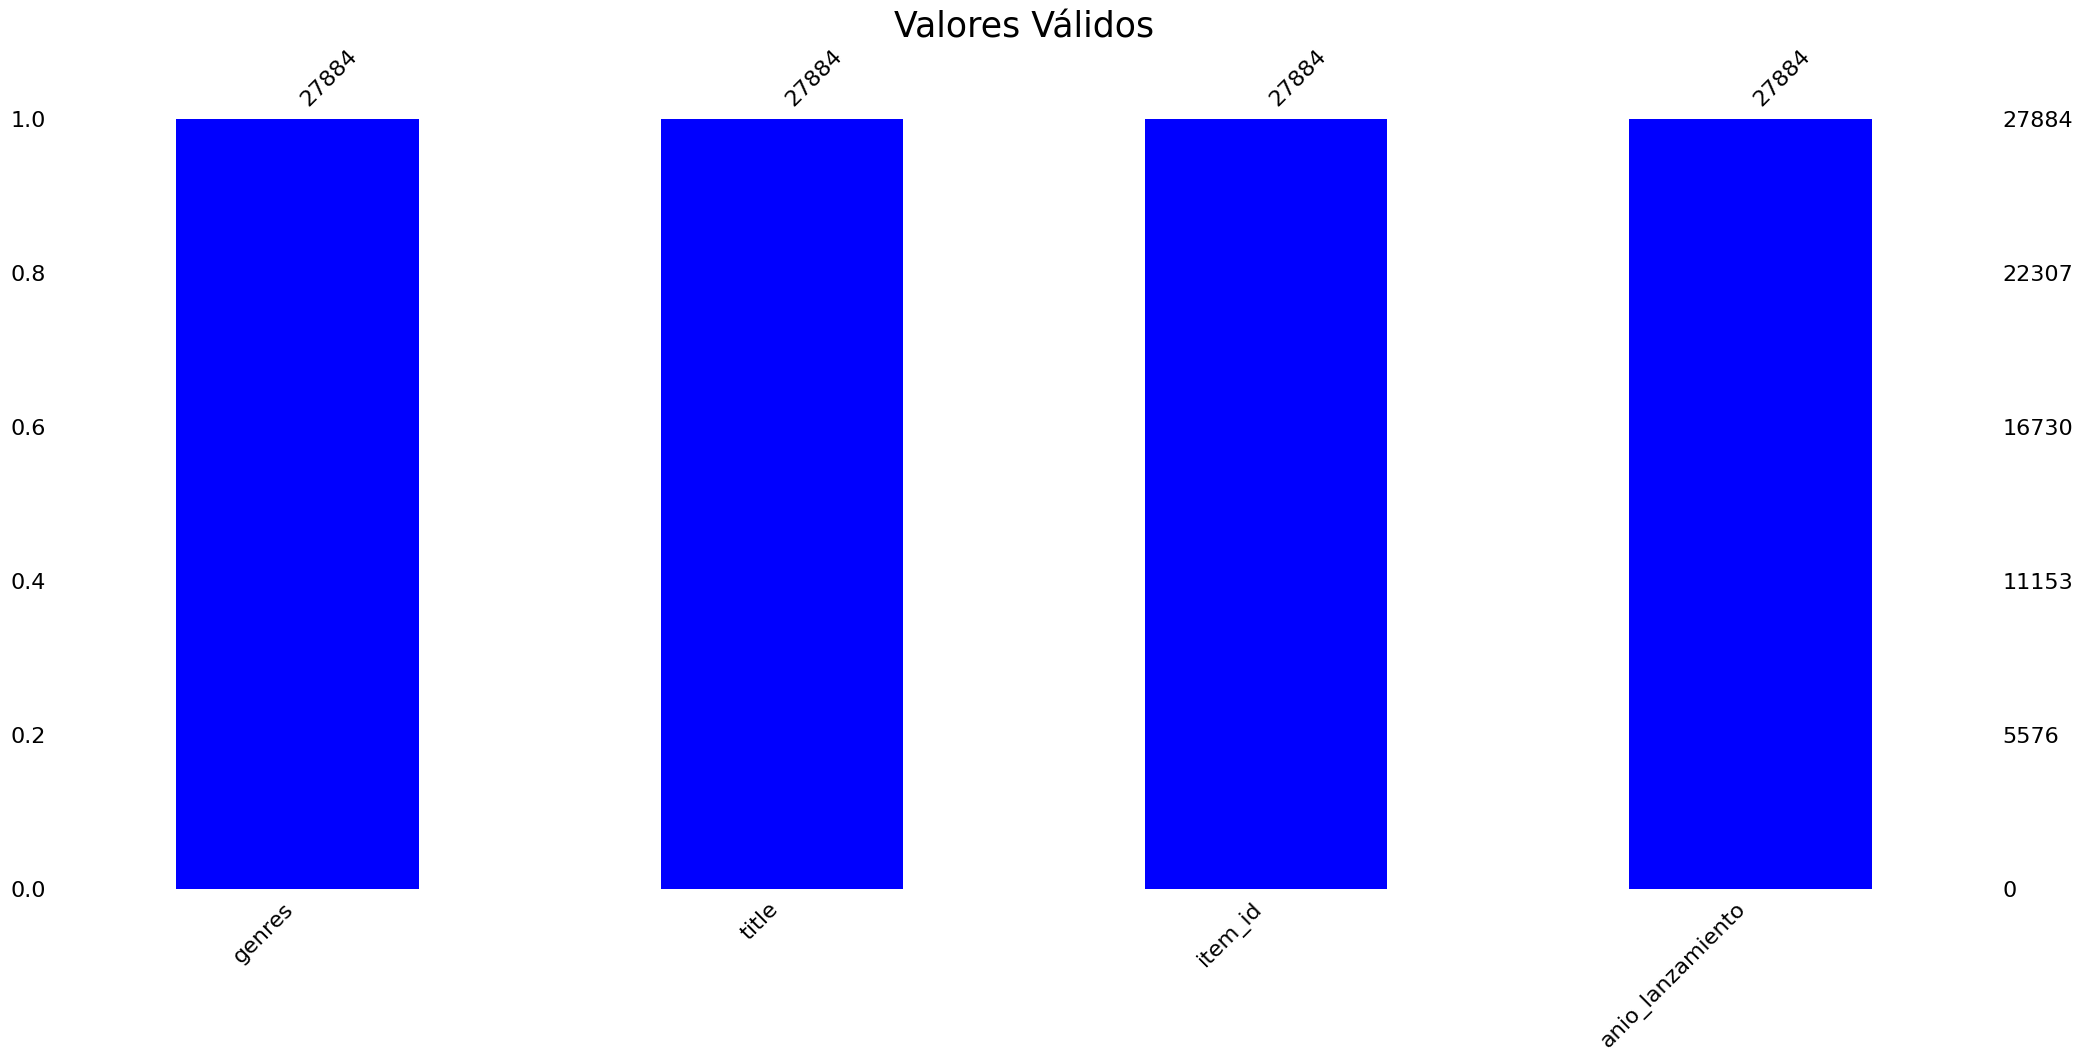

In [79]:
#graficamos los registros válidos
missingno.bar(df_DB, color="blue")
plt.title("Valores Válidos", fontsize=25)

### Análisis de distribución de los datos

In [80]:
# Distribución de la registros por genero (genres)
genero = df_DB["genres"].value_counts()
porcentaje = 100*df_DB["genres"].value_counts(normalize=True)
pd.DataFrame({"Generos":genero, "Porcentaje":porcentaje.round(2)})

,Generos,Porcentaje
genres,,
action,1738,6.23
"action,indie",1622,5.82
simulation,1373,4.92
"casual,simulation",1359,4.87
"action,adventure,indie",1049,3.76
...,...,...
"animation &amp,modeling,audio production,design &amp,illustration,software training,video production",1,0.00
"action,free to play,simulation",1,0.00
"casual,indie,sports,strategy,early access",1,0.00


In [81]:
import plotly.express as px
fig = px.histogram(df_DB, x="genres",title="Distribución de Genres")
fig.update_layout(bargap=0.1)
fig.show()

In [82]:
# Distribución de la registros por anio_lanzamiento
lanzamiento = df_DB["anio_lanzamiento"].value_counts()
porcentaje = 100*df_DB["anio_lanzamiento"].value_counts(normalize=True)
pd.DataFrame({"Analisis por Año de lanzamiento":lanzamiento, "Porcentaje":porcentaje.round(2)})

,Analisis por Año de lanzamiento,Porcentaje
anio_lanzamiento,,
2017,9230,33.10
2016,6692,24.00
2015,4794,17.19
2014,2727,9.78
2013,1477,5.30
2012,1137,4.08
2011,541,1.94
2010,393,1.41
2009,316,1.13


In [83]:
import plotly.express as px
fig = px.histogram(df_DB, x="anio_lanzamiento",title="Distribución por Año de Lanzamiento")
fig.update_layout(bargap=0.1)
fig.show()

### Grabación del dataframe con el archivo para la API en formato csv

In [84]:
df_DB.to_csv("../data/osg_api.csv", index=False)

****

In [100]:
del df_DB

NameError: name 'df_DB' is not defined

In [101]:
df_DB_MR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27883 entries, 0 to 27883
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genres            27883 non-null  object
 1   title             27883 non-null  object
 2   tags              27883 non-null  object
 3   specs             27883 non-null  object
 4   price             26932 non-null  object
 5   early_access      27883 non-null  object
 6   item_id           27883 non-null  int32 
 7   developer         27723 non-null  object
 8   anio_lanzamiento  27883 non-null  int32 
dtypes: int32(2), object(7)
memory usage: 1.9+ MB


In [102]:
df_DB_MR.isna().sum()

genres                0
title                 0
tags                  0
specs                 0
price               951
early_access          0
item_id               0
developer           160
anio_lanzamiento      0
dtype: int64

In [103]:
df_DB_MR[df_DB_MR["item_id"].duplicated()]

,genres,title,tags,specs,price,early_access,item_id,developer,anio_lanzamiento


In [107]:
df_DB_MR.drop_duplicates("item_id", inplace=True)
df_DB_MR.reset_index(inplace=True, drop=True)

In [108]:
def depuro_listas(columna:str):
    columna = columna.str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"',"").str.replace(';',",")

    # Reemplazo los registros que contienen NaN 
    # por una cadena de texto vacía
    columna[(columna.isna()) | (columna.isnull())] = ""

    # Recorro cada una de los registros y quito 
    # los espacios en los extremos de cada elemento
    for i in range(1,len(df_DB_MR.index)):
        cadena = ""
        for j,elemento in enumerate(list(columna[i].split(","))):
            if j > 0:
                cadena += ","
            cadena += elemento.strip()
        columna[i] = cadena
    return columna

In [109]:
df_DB_MR["genres"] = depuro_listas(df_DB_MR["genres"])

In [110]:
df_DB_MR["tags"] = depuro_listas(df_DB_MR["tags"])

In [111]:
df_DB_MR["specs"] = depuro_listas(df_DB_MR["specs"])

In [112]:
df_DB_MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27883 entries, 0 to 27882
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genres            27883 non-null  object
 1   title             27883 non-null  object
 2   tags              27883 non-null  object
 3   specs             27883 non-null  object
 4   price             26932 non-null  object
 5   early_access      27883 non-null  object
 6   item_id           27883 non-null  int32 
 7   developer         27723 non-null  object
 8   anio_lanzamiento  27883 non-null  int32 
dtypes: int32(2), object(7)
memory usage: 1.7+ MB


In [113]:
df_DB_MR["item_id"] = df_DB_MR["item_id"].astype(int)

In [114]:
df_DB_MR.sample(20)

,genres,title,tags,specs,price,early_access,item_id,developer,anio_lanzamiento
25996,simulation,Rise of Flight: Furious Wings,simulation,"single-player,multi-player,co-op,downloadable ...",14.99,False,244061,777 Studios,2013
25482,"casual,simulation",Rocksmith® 2014 – Boston - “Foreplay/Long Time”,"casual,simulation","single-player,shared/split screen,downloadable...",2.99,False,271443,Ubisoft - San Francisco,2014
16111,"action,casual,indie",Universe in Fire,"casual,indie,action,2d","single-player,steam trading cards",1.99,False,604570,putilin_industries,2017
15404,"adventure,casual,indie",Darkarta: A Broken Heart's Quest CE - Music Pack,"indie,casual,adventure,great soundtrack,atmosp...","single-player,downloadable content,steam achie...",9.99,False,629310,Tuttifrutti Interactive,2017
9010,"action,casual,indie",Loptice,"action,indie,casual",single-player,2.99,False,659910,Aleksandar Dakic,2017
5257,"action,casual,indie",Defy Gravity Extended,"platformer,indie,puzzle,space,action,2d,single...","single-player,steam achievements,full controll...",1.99,False,96100,Paul Fisch,2016
25769,"action,indie",Vector,"parkour,action,indie,platformer,singleplayer,t...","single-player,steam achievements,full controll...",6.99,False,248970,NaN,2013
23545,strategy,Siege of Turtle Enclave,"strategy,indie,fantasy,4x,medieval",single-player,4.99,False,340920,The Conjurer's Tower,2014
13679,"casual,indie,strategy",Eight-Minute Empire: Isthmus of Gom Map,"strategy,indie,casual","single-player,multi-player,online multi-player...",2.99,False,702415,"Acram Digital,Mobo Studio",2017
24866,"indie,rpg",Heroes Rise: HeroFall - Ad Space,"rpg,indie","single-player,downloadable content,steam achie...",0.99,False,313932,Choice of Games,2014


### Grabo el archivo para el dataframe del Modelo de Recomendación de Juego (item-item)

In [115]:
df_DB_MR.to_csv("../data/osg_mr.csv", index=False)